The graph below simulates the changing weights that may be configured into a single perceptron, or node.

This is similar to a neuron firing from stimulation; a certain input, or in human brain terms, stimuli, cause it to "fire" - which in code signifies a value "1" (but this can be defined as something else in code if desired) 

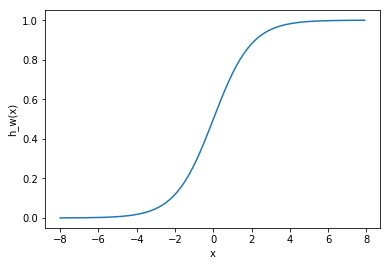

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x=np.arange(-8,8,.1)
f = 1 / (1 + np.exp(-x))
plt.plot(x,f)
plt.xlabel('x')
plt.ylabel('h_w(x)')
plt.show()

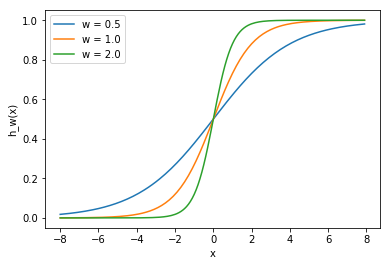

In [3]:
w1 = 0.5
w2 = 1.0
w3 = 2.0

l1 = 'w = 0.5'
l2 = 'w = 1.0'
l3 = 'w = 2.0'

for w, l in [(w1, l1), (w2, l2), (w3, l3)]:
  f = 1 / (1 + np.exp(-x*w))
  plt.plot(x,f, label=l)
plt.xlabel('x')
plt.ylabel('h_w(x)')
plt.legend(loc=2)
plt.show()

"The node is the “seat” of the activation
function, and takes the weighted inputs, sums them, then inputs them to the activation
function. The output of the activation function is shown as h in the above diagram."

The differing weight changes the slope, which is useful for altering weights of inputs.

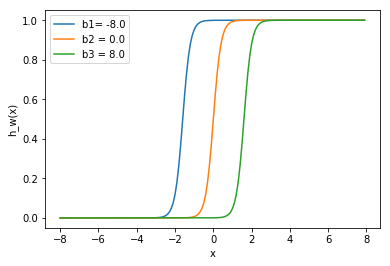

In [4]:
#Bias adjustments
w = 5.0
b1= -8.0
b2 = 0.0
b3 = 8.0

l1 = 'b1= -8.0'
l2 = 'b2 = 0.0'
l3 = 'b3 = 8.0'

for b, l in [(b1,l1), (b2,l2), (b3,l3)]:
    f = 1 / (1 + np.exp(-x*w+b))
    plt.plot(x,f,label=l)
plt.xlabel('x')
plt.ylabel('h_w(x)')
plt.legend(loc=2)
plt.show()

Adding this bias term simulates an "if" statement, which is extremely useful for conditional relationships

In ANNs, the  connections have a weight associated with each.

Because the bias does not have a true node with an activation function, it does not have inputs (the value is +1)

These values need to be calculated in the training phase of the ANN.

**Feed Forward Pass**

Weights in the hidden layer are then passed through the activation function to calculate the output layer. 



In [0]:
#a feed forward example
w1 = np.array([[0.2, 0.2, 0.2], [0.4, 0.4, 0.4], [0.6, 0.6, 0.6]])
w2=np.zeros((1,3))
w2[0,:] = np.array([.5,.5,.5])

dummy values in the layer 1 bias weight array/vector, and the
layer 2 bias weight (which is only a single value in this neural network structure – i.e. a
scalar):

In [0]:
b1 = np.array([.8,.8,.8])
b2 = np.array([.2])

In [0]:
#recommend setting up a separate activation function
def f(x):
  return 1/ (1 + np.exp(-x))

In [0]:
#here is a function for calculating the output of ANN albeit less efficient from other methods

def simple_ann(n_layers,x,w,b):
  for l in range(n_layers-1):
    #input array where weights are multiplied by each layer
    #first layer = input array is x input vector
    #not in first layer = input is output of previous layer
    if l ==0:
      node_in = x
    else:
      node_in = h
    #set up output aay fo nodes in layer l + 1
    h = np.zeros((w[l].shape[0],))
    #loop through rows of weight array
    for i in range(w[l].shape[0]):
      #set up sum in activation function
      f_sum = 0
      #looks through cols of weight array
      for j in range(w[l].shape[1]):
        f_sum += w[l][i][j] * node_in[j]
        
        #add bias
        f_sum += b[l][i]
        #use activation function to calc i-th output (h1, h2, etc)
        h[i] = f(f_sum)
        
  return h

"The function first checks what the input is to the layer of nodes/weights being considered.
If we are looking at the first layer, the input to the second layer nodes is the input vector x
multiplied by the relevant weights. After the first layer though, the inputs to subsequent
layers are the output of the previous layers. Finally, there is a nested loop through the
relevant I and j values of the weight vectors and the bias. The function uses the
dimensions of the weights for each layer to figure out the number of nodes and therefore
the structure of the network."

In [9]:
w= [w1,w2]
b = [b1,b2]
x=[1.5,2.0,3.0]
simple_ann(3, x, w, b)

array([0.88930618])

In [10]:
#it was mentioned the loop method is inefficient because of timeliness
%timeit simple_ann(3,x,w,b)

The slowest run took 4.09 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 36 µs per loop


**Gradient Descent and Optimization**

The point of many models is to reduce the error of input-output values

These inputs and outputs can be represented as vectors

For instance, in an output with n dimensional vectors, the output can be binarized to 0,1 to classify the presence of a feature or not (ie: 26 features for the alphabet)

The weights vary to optimize the ANN.

**Gradient descent** is often shown as a parabolic graph that symbolizes the reduction of the error term through iterations. We want *w* to change in a way that enhances our model so the error term is closest to 0, or the peak of the parabola. 

The correction in the value of *w* is:

*w* new = *w* old - alpha * Verror

Where Verror is the gradient of the error at *w* old and alpha is the step size (or learning parameter, best at around .1)

**The Cost Function**

Generalized way of reducing the cost function in single trining pair (x^z, y^z):

J(w,b,x,y) = 1/2ll y^z - h^(n1)(x^z) ll^2
                  = 1/2ll y^z - y*pred*(x^z) ll^2  
                  
                  
"This shows the cost function of the *zth* training sample, where h(n1) is the output of the
final layer of the neural network i.e. the output of the neural network."

"The two vertical lines represent the L^2 norm of the error, or what is known as the sum-of-
squares error (SSE). SSE is a very common way of representing the error of a machine learning system."